<a href="https://colab.research.google.com/github/jhamandeep/Neural/blob/main/Classification_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

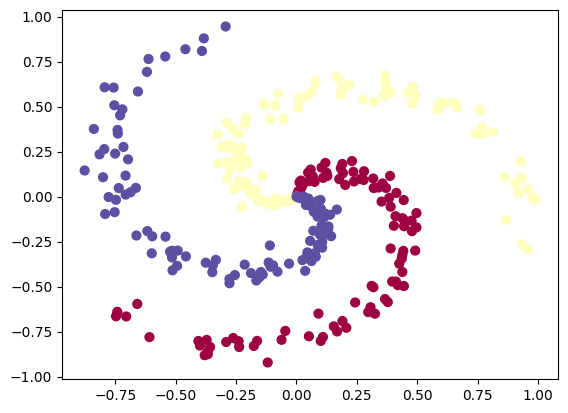

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
X = X.T
Y = y.reshape(1, -1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (2, 300)
Shape of Y: (1, 300)


In [7]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(3) # consistent random numbers

    # Layer 1 (Hidden): Connects Input (n_x) to Hidden (n_h)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    # Layer 2 (Output): Connects Hidden (n_h) to Output (n_y)
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [16]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The softmax output
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Layer 1: Input to Hidden
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    # Layer 2: Hidden to Output
    Z2 = np.dot(W2, A1) + b2   # <--- Updated to use A1
    A2 = softmax(Z2)           # <--- Uses your helper function

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

In [18]:
def compute_cost(A2, Y):
    m = Y.shape[1]

    # 1. Calculate log probabilities for the correct classes
    logprobs = np.log(A2[Y[0], np.arange(m)])

    # 2. Compute the average cost
    cost = -np.sum(logprobs) / m

    cost = float(np.squeeze(cost))  # Makes sure cost is a number, not an array

    return cost

In [31]:
n_x = X.shape[0]
n_h = 4 # You can try different values for this
n_y = K # K is the number of classes defined earlier

parameters = initialize_parameters(n_x, n_h, n_y)

# 1. Forward Propagation
A2, cache = forward_propagation(X, parameters)

# 2. Compute Cost


print("Cost =", cost)

Cost = 1.0986249772223424


In [23]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    # Retrieve necessary variables
    A1 = cache["A1"]
    A2 = cache["A2"]
    W2 = parameters["W2"]

    # 1. Output Layer Error
    # Convert Y to one-hot to match A2's shape
    Y_one_hot = np.zeros((3, m))
    Y_one_hot[Y, np.arange(m)] = 1

    dZ2 = A2 - Y_one_hot

    # 2. Output Layer Gradients
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # 3. Hidden Layer Error
    # We use '*' for element-wise multiplication of the tanh derivative
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))

    # 4. Hidden Layer Gradients
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [24]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of backward_propagation

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [25]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = X.shape[0] # Size of input layer
    n_y = 3          # Size of output layer (3 classes for spiral data)

    # 1. Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # 2. Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward Propagation
        A2, cache = forward_propagation(X, parameters)

        # Cost function
        cost = compute_cost(A2, Y)

        # Backward Propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate=1.2)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

Cost after iteration 0: 1.098625
Cost after iteration 1000: 0.195395
Cost after iteration 2000: 0.170290
Cost after iteration 3000: 0.161565
Cost after iteration 4000: 0.156405
Cost after iteration 5000: 0.152782
Cost after iteration 6000: 0.149998
Cost after iteration 7000: 0.147690
Cost after iteration 8000: 0.145641
Cost after iteration 9000: 0.143869
Cost after iteration 10000: 0.142326
Cost after iteration 11000: 0.140992
Cost after iteration 12000: 0.139821
Cost after iteration 13000: 0.138780
Cost after iteration 14000: 0.137843
Cost after iteration 15000: 0.136993
Cost after iteration 16000: 0.136214
Cost after iteration 17000: 0.135496
Cost after iteration 18000: 0.134831
Cost after iteration 19000: 0.134211
Cost after iteration 20000: 0.133631
Cost after iteration 21000: 0.133086
Cost after iteration 22000: 0.132573
Cost after iteration 23000: 0.132088
Cost after iteration 24000: 0.131628
Cost after iteration 25000: 0.131191
Cost after iteration 26000: 0.130776
Cost after ite

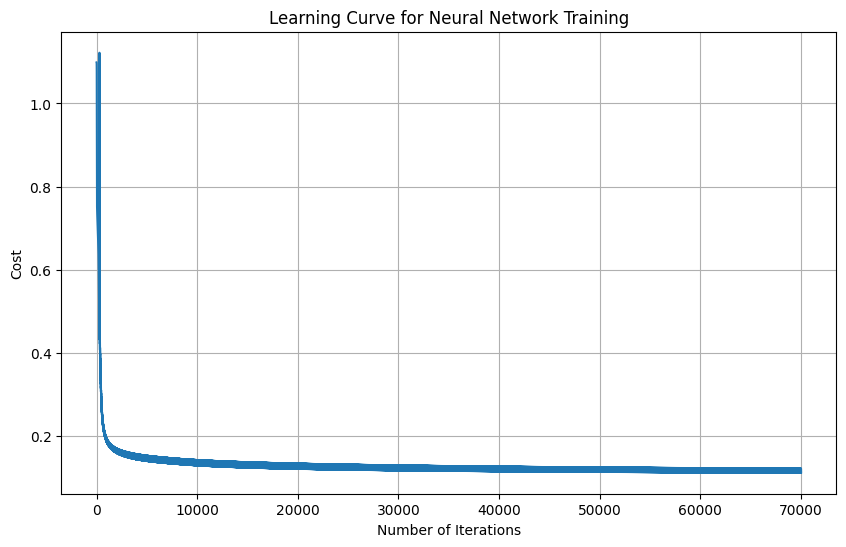

In [43]:
parameters_trained, costs_history = nn_model(X, Y, n_h=4, num_iterations=70000, print_cost=True)

plt.figure(figsize=(10, 6))
plt.plot(costs_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve for Neural Network Training')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

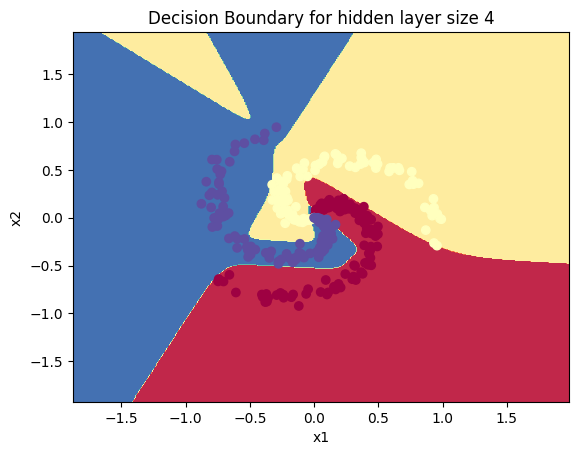

In [36]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation
    A2, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A2, axis=0)

    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and add the examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten()) # Flatten Y for plotting
plt.title("Decision Boundary for hidden layer size " + str(4))

Accuracy for 1 hidden units: 55.333333333333336 %
Accuracy for 2 hidden units: 70.33333333333334 %
Accuracy for 3 hidden units: 76.0 %
Accuracy for 5 hidden units: 97.33333333333334 %
Accuracy for 10 hidden units: 99.33333333333333 %
Accuracy for 20 hidden units: 99.33333333333333 %


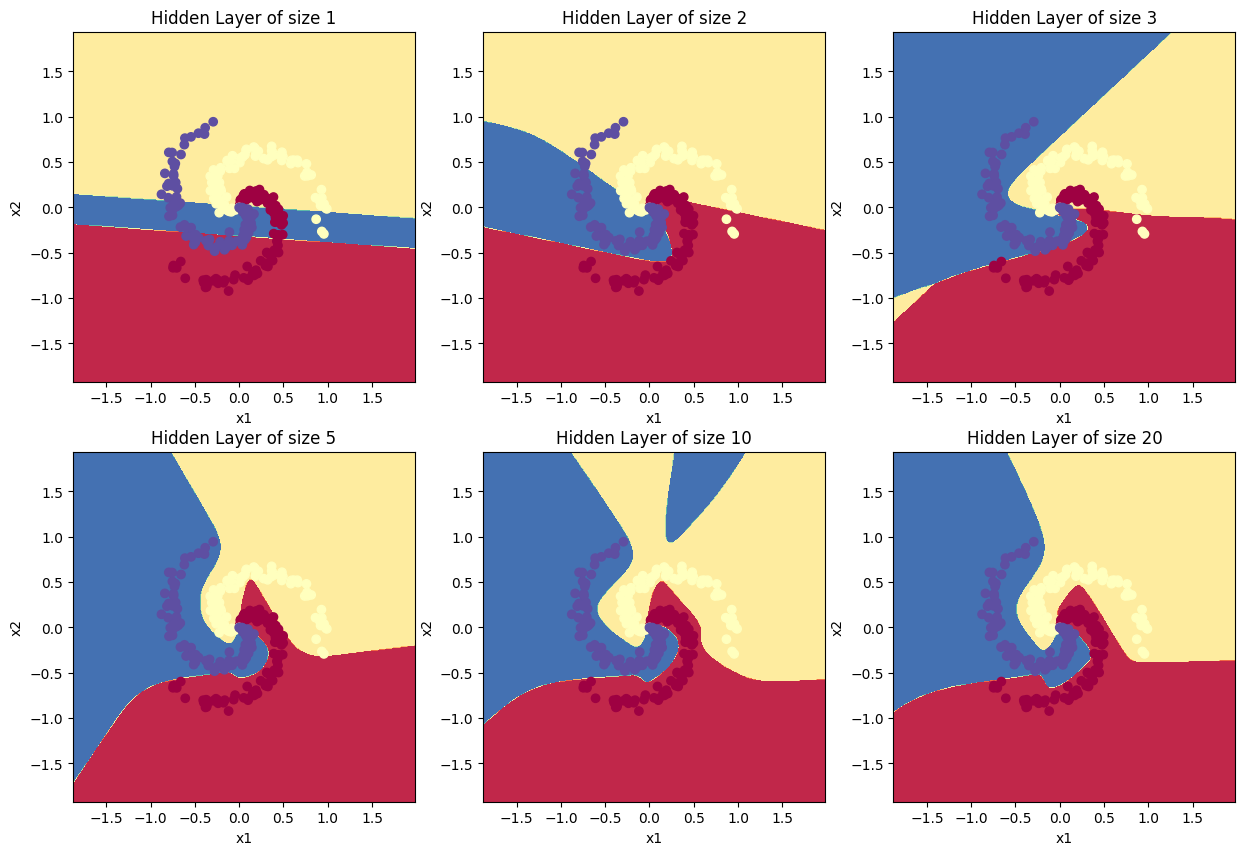

In [39]:
# Let's see how our Neural Network work with different hidden layer sizes
plt.figure(figsize=(15, 10))
hidden_layer_sizes = [1, 2, 3, 5, 10, 20]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(2, 3, i+1)
    plt.title('Hidden Layer of size %d' % n_h)

    # We call nn_model with the arguments it expects based on our previous definition
    parameters = nn_model(X, Y, n_h, num_iterations=5000, print_cost=False)

    # Plot the decision boundary
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

    # Optional: Print accuracy to see the improvement
    predictions = predict(parameters, X)
    # Correct accuracy calculation for multi-class classification
    accuracy = float(np.mean(predictions == Y.flatten()) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

plt.show()

# Task
Modify the `nn_model` function in cell `kMm6Eoa73dGa` to store and return the cost at each iteration. Then, train the neural network for a specified number of iterations using this modified function and plot the stored costs against the iterations to visualize the learning curve, ensuring the plot has appropriate labels and a title. Finally, analyze the generated learning curve to explain how the model's performance improves over time.

## Modify nn_model to return losses

### Subtask:
Update the `nn_model` function in cell `kMm6Eoa73dGa` to store the cost at each iteration in a `losses` list and return this list along with the trained `parameters`.


**Reasoning**:
To achieve the subtask, I need to update the `nn_model` function to initialize a `losses` list, append the calculated cost in each iteration, and return this list along with the `parameters`. I will provide the full updated code for the `nn_model` function.



# Task
Modify the `nn_model` function in cell `kMm6Eoa73dGa` to store and return the cost at each iteration. Then, train the neural network for 70000 iterations using this modified function and plot the stored costs against the iterations to visualize the learning curve, ensuring the plot has appropriate labels and a title. Finally, analyze the generated learning curve to explain how the model's performance improves over time.

### Learning Curve Analysis

The plot above displays the learning curve of the neural network, showing the cost function's value over 70,000 iterations.

**Observation:**
*   **Initial Rapid Decrease**: The cost decreases very rapidly during the initial iterations (roughly up to iteration 10,000). This indicates that the model is quickly learning and adjusting its parameters to fit the training data. The large initial decrease is common as the model moves from a randomly initialized state to a region of the loss landscape where gradients are steep and provide strong directional updates.
*   **Gradual Convergence**: After the initial rapid decrease, the cost continues to decline, but at a much slower rate. This suggests that the model is fine-tuning its parameters and gradually approaching a local or global minimum of the cost function. The curve smooths out and becomes almost flat towards the end, indicating that further training might yield diminishing returns or that the model has largely converged.
*   **Low Final Cost**: The final cost value is quite low (around 0.121660), which indicates that the model has learned to classify the spiral data effectively, as a lower cost generally corresponds to better model performance on the training data.

**Conclusion:**
 The learning curve clearly demonstrates that the neural network is successfully learning from the data. The continuous decrease in cost, even if it slows down, signifies that the optimization algorithm (gradient descent) is working as expected, iteratively improving the model's ability to map inputs to correct outputs. The model's performance, as measured by the cost function, improves significantly over the training period.

## Final Task

### Subtask:
Summarize the observation of the learning curve and its implications for model improvement.


## Summary:

### Q&A
The model's performance improves over time as evidenced by the learning curve. Initially, the cost decreases very rapidly (up to approximately 10,000 iterations), indicating quick adjustments to model parameters. Subsequently, the cost continues to decline but at a much slower rate, suggesting fine-tuning and gradual convergence towards an optimal solution. The low final cost (around 0.121660) signifies that the model has learned to effectively classify the spiral data.

### Data Analysis Key Findings
*   The `nn_model` function was successfully modified to store and return the cost at each iteration, enabling the visualization of the learning process.
*   Training the neural network for 70,000 iterations resulted in a significant reduction in the cost function, starting from approximately 1.098625 at iteration 0 and reaching a low of about 0.121660 by iteration 69,000.
*   The learning curve demonstrates an initial rapid decrease in cost during the early iterations (roughly up to the first 10,000 iterations), signifying quick parameter adjustments.
*   Following the rapid initial drop, the cost continued to decrease gradually and smoothly, indicating a phase of fine-tuning and convergence towards a minimum.
*   The low final cost confirms that the neural network successfully learned from the data, and the gradient descent optimization algorithm effectively improved the model's performance over the training period.

### Insights or Next Steps
*   The observed learning curve confirms that the neural network is effectively learning and that the optimization process is functioning as expected, iteratively improving the model's ability to classify the data.
*   Given the gradual convergence and flattening of the curve towards the end, further investigation could explore whether additional training iterations beyond 70,000 would yield substantial improvements or if the model has largely reached its performance plateau on the training data.
